In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sac_tools.Sac import Sac

In [2]:
HDD = "TOSHIBA_HDD"
station = "EV.SMN"
channel = "wU"  
parent_folder = "110202/11020220h/"
file_name = "/Volumes/{:s}/Final Year Projects/Shinmoedake Data/shinmoedake seismographs/".format(HDD)
file_name = file_name + parent_folder + station + "." + channel
pz_file_name = "/Volumes/{:s}/Final Year Projects/Shinmoedake Data/kirishima_invert/tri120p".format(HDD)

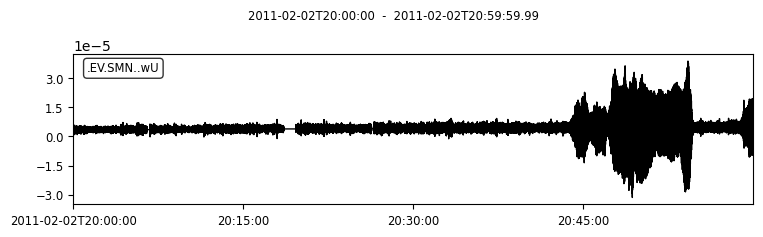

In [3]:
# Create a Sac object and read the contents of a .sac file.
sac = Sac()
sac.read_sac(file_name)

# Load the seismometer response (pole-zero) file data.
sac.read_pz_file(pz_file_name)

# Plot the loaded seismic time series.
sac.plot()

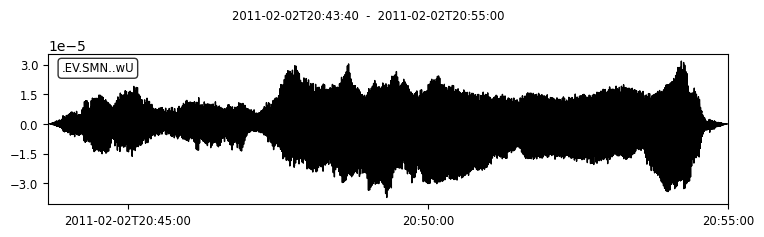

In [4]:
# Trim the data to the specified time range.
sac.trim("20110202 20:43:40", "20110202 20:55:00")

# Using the loaded seismometer response, remove it from the seismogram.
sac.remove_resp()

sac.plot()

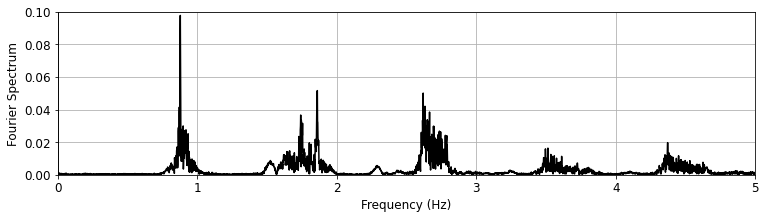

In [5]:
# Calculate and plot the discrete fourier transform of the loaded time series.
# We set the frequency range to be 0~5 Hz.
sac.plot_dft(figsize = [12.5, 3], xlim = [0, 5], ylim = [0, 0.1])

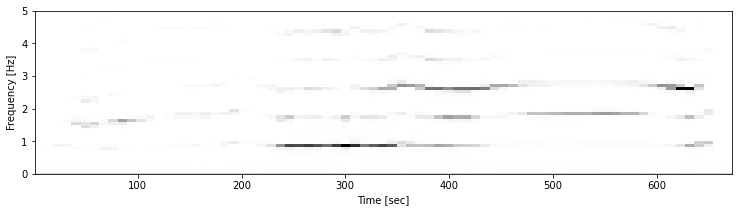

In [6]:
# Calculate and plot the spectrogram of the loaded time series.
# We set the frequency range to be 0~5 Hz, and use 1024 points per fft segment.
sac.spectrogram(nperseg = 1024, ylim = [0, 5])

In [7]:
# Convert the loaded .sac time series as a pandas DataFrame for further numerical analysis in Python. 
df = sac.make_df(column_name = "smn_u")
display(df)

,smn_u
datetime,
2011-02-02 20:43:40+00:00,0.000006
2011-02-02 20:43:40.010000+00:00,0.000006
2011-02-02 20:43:40.020000+00:00,0.000006
2011-02-02 20:43:40.030000+00:00,0.000005
2011-02-02 20:43:40.040000+00:00,0.000005
...,...
2011-02-02 20:54:59.960000+00:00,0.000004
2011-02-02 20:54:59.970000+00:00,0.000004
2011-02-02 20:54:59.980000+00:00,0.000004
